# Life Expectancy and GDP

### Overview:

    I analyzed data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.I will analyze, prepare, and plot data in order to answer questions in a meaningful way.

1. Firstly, I imported the libraries needed for this particular project, then I opened and read the CSV file, all_data.csv. After that, I used .head method to inspect the first couple of rows from the file to see what we are working with.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('all_data.csv')
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [8]:
print(data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


2. Secondly, we looked over what type ofo data we have in this CSV file and we observe two float64 values, one int, and one object. This data seems clean with no missing values. Then I wanted to see the countries we are going to analyze and we saw that there are six different countries in this data.

In [10]:
data.rename(columns={'Life expectancy at birth (years)': 'LEABY'}, inplace= True)
data.head()

,Country,Year,LEABY,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


3. Here, I just renamed the Life expectancy at birth (years) column with LEABY to have shorter name columns and a much more compact table. 

4. After looking over the data, I decided to use the seaborn library to put together some graphs that help me visualize how the GDP and Life Expectancy changed over time. I used hue in order to see the lines for each country in the same graph and to make it easier to compare the values bewteen countries.  

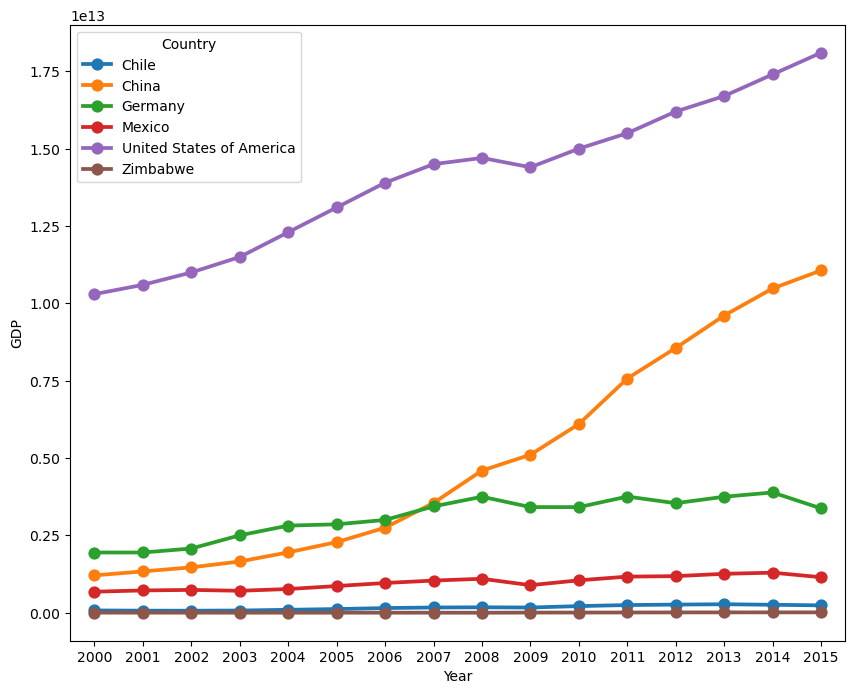

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(10,8))
sns.pointplot(x='Year', y='GDP', hue='Country', data=data)
ax = sns.pointplot()

plt.show()
plt.clf()

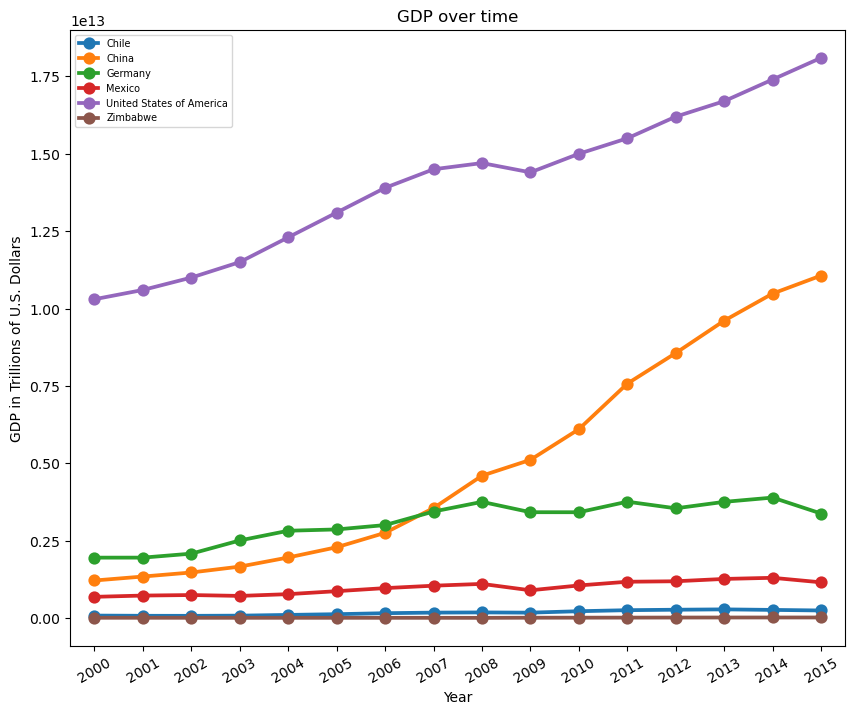

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(10,8))
sns.pointplot(x='Year', y='GDP', hue='Country', data=data)
ax = sns.pointplot()

plt.xticks(rotation=30, fontsize=10)
plt.ylabel('GDP in Trillions of U.S. Dollars')
plt.title('GDP over time')
plt.legend(fontsize = 7)
plt.show()
plt.clf()

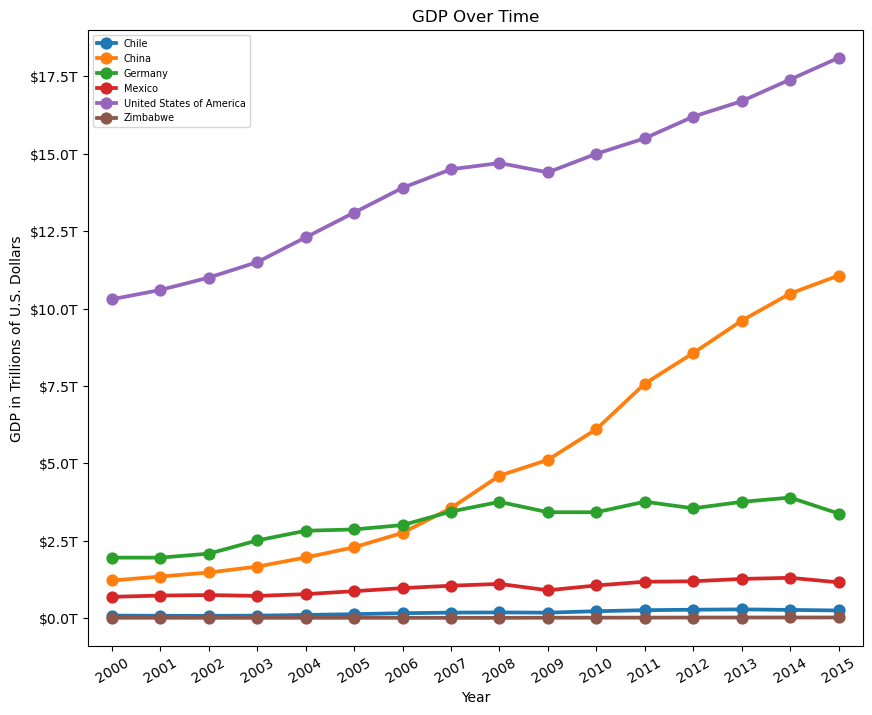

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(10,8))
from matplotlib.ticker import FuncFormatter
def trillions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fT' % (x*1e-12)

formatter = FuncFormatter(trillions)

sns.pointplot(x='Year', y='GDP', hue='Country', data=data)
ax = sns.pointplot()

plt.xticks(rotation=30, fontsize=10)
plt.ylabel('GDP in Trillions of U.S. Dollars')
ax.yaxis.set_major_formatter(formatter)
plt.title('GDP Over Time')
plt.legend(fontsize = 7)
plt.show()
plt.clf()

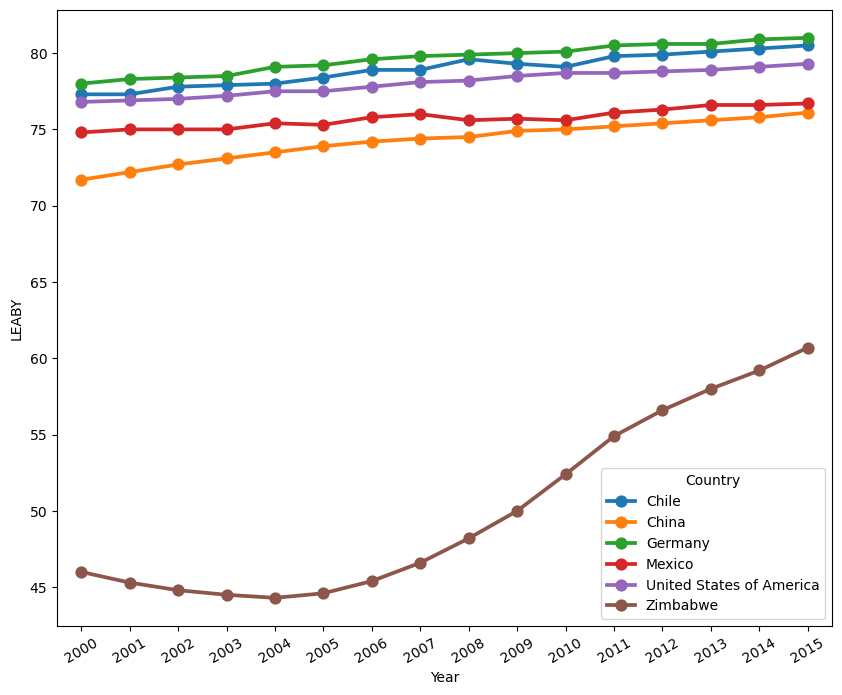

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(10,8))
sns.pointplot(x='Year', y='LEABY', hue='Country', data=data)
plt.xticks(rotation=30)
plt.show()
plt.clf()

5. The graphs were not organzied nicely and a little confusing. I worked on them a little to make sure we can clearly see the values for each country and make them look nice and organized so everyone that looks at them would be able to understand what is in there. Once I was done with that, I put both final graphs into a figure to see them next to each other and see some connections between GDP and Life Expectancy.

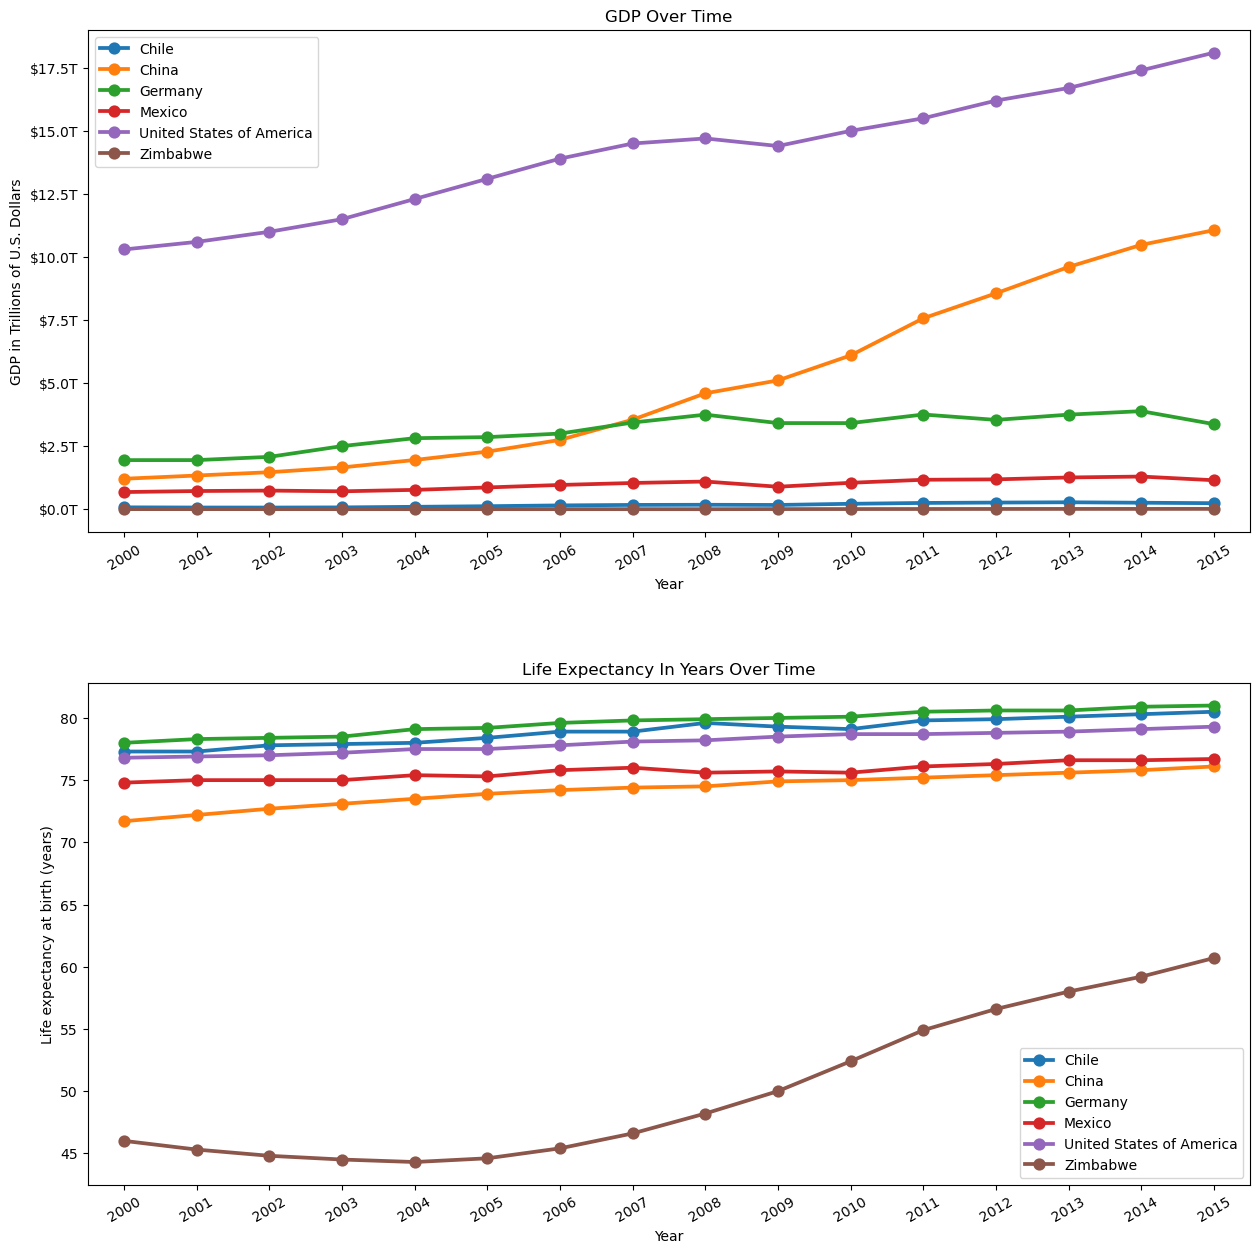

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
from matplotlib.ticker import FuncFormatter
def trillions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fT' % (x*1e-12)

formatter = FuncFormatter(trillions)

sns.pointplot(x='Year', y='GDP', hue='Country', data=data)
ax = sns.pointplot()

plt.xticks(rotation=30, fontsize=10)
plt.ylabel('GDP in Trillions of U.S. Dollars')
ax.yaxis.set_major_formatter(formatter)
plt.title('GDP Over Time')
plt.legend()

plt.subplot(2,1,2)
sns.pointplot(x='Year', y='LEABY', hue='Country', data=data)
plt.xticks(rotation=30)
plt.ylabel('Life expectancy at birth (years)')
plt.legend()
plt.title('Life Expectancy In Years Over Time')
plt.subplots_adjust(hspace = 0.3)
plt.show()
plt.clf()

6. Below, I created another figure where I put the scatter plots for each country next to each other. These scatters are meant to show what type of relationship, if any, there is between GDP and LEABY. Here, we have a figure with 3 columns and 2 rows displaying the relationships for each country.

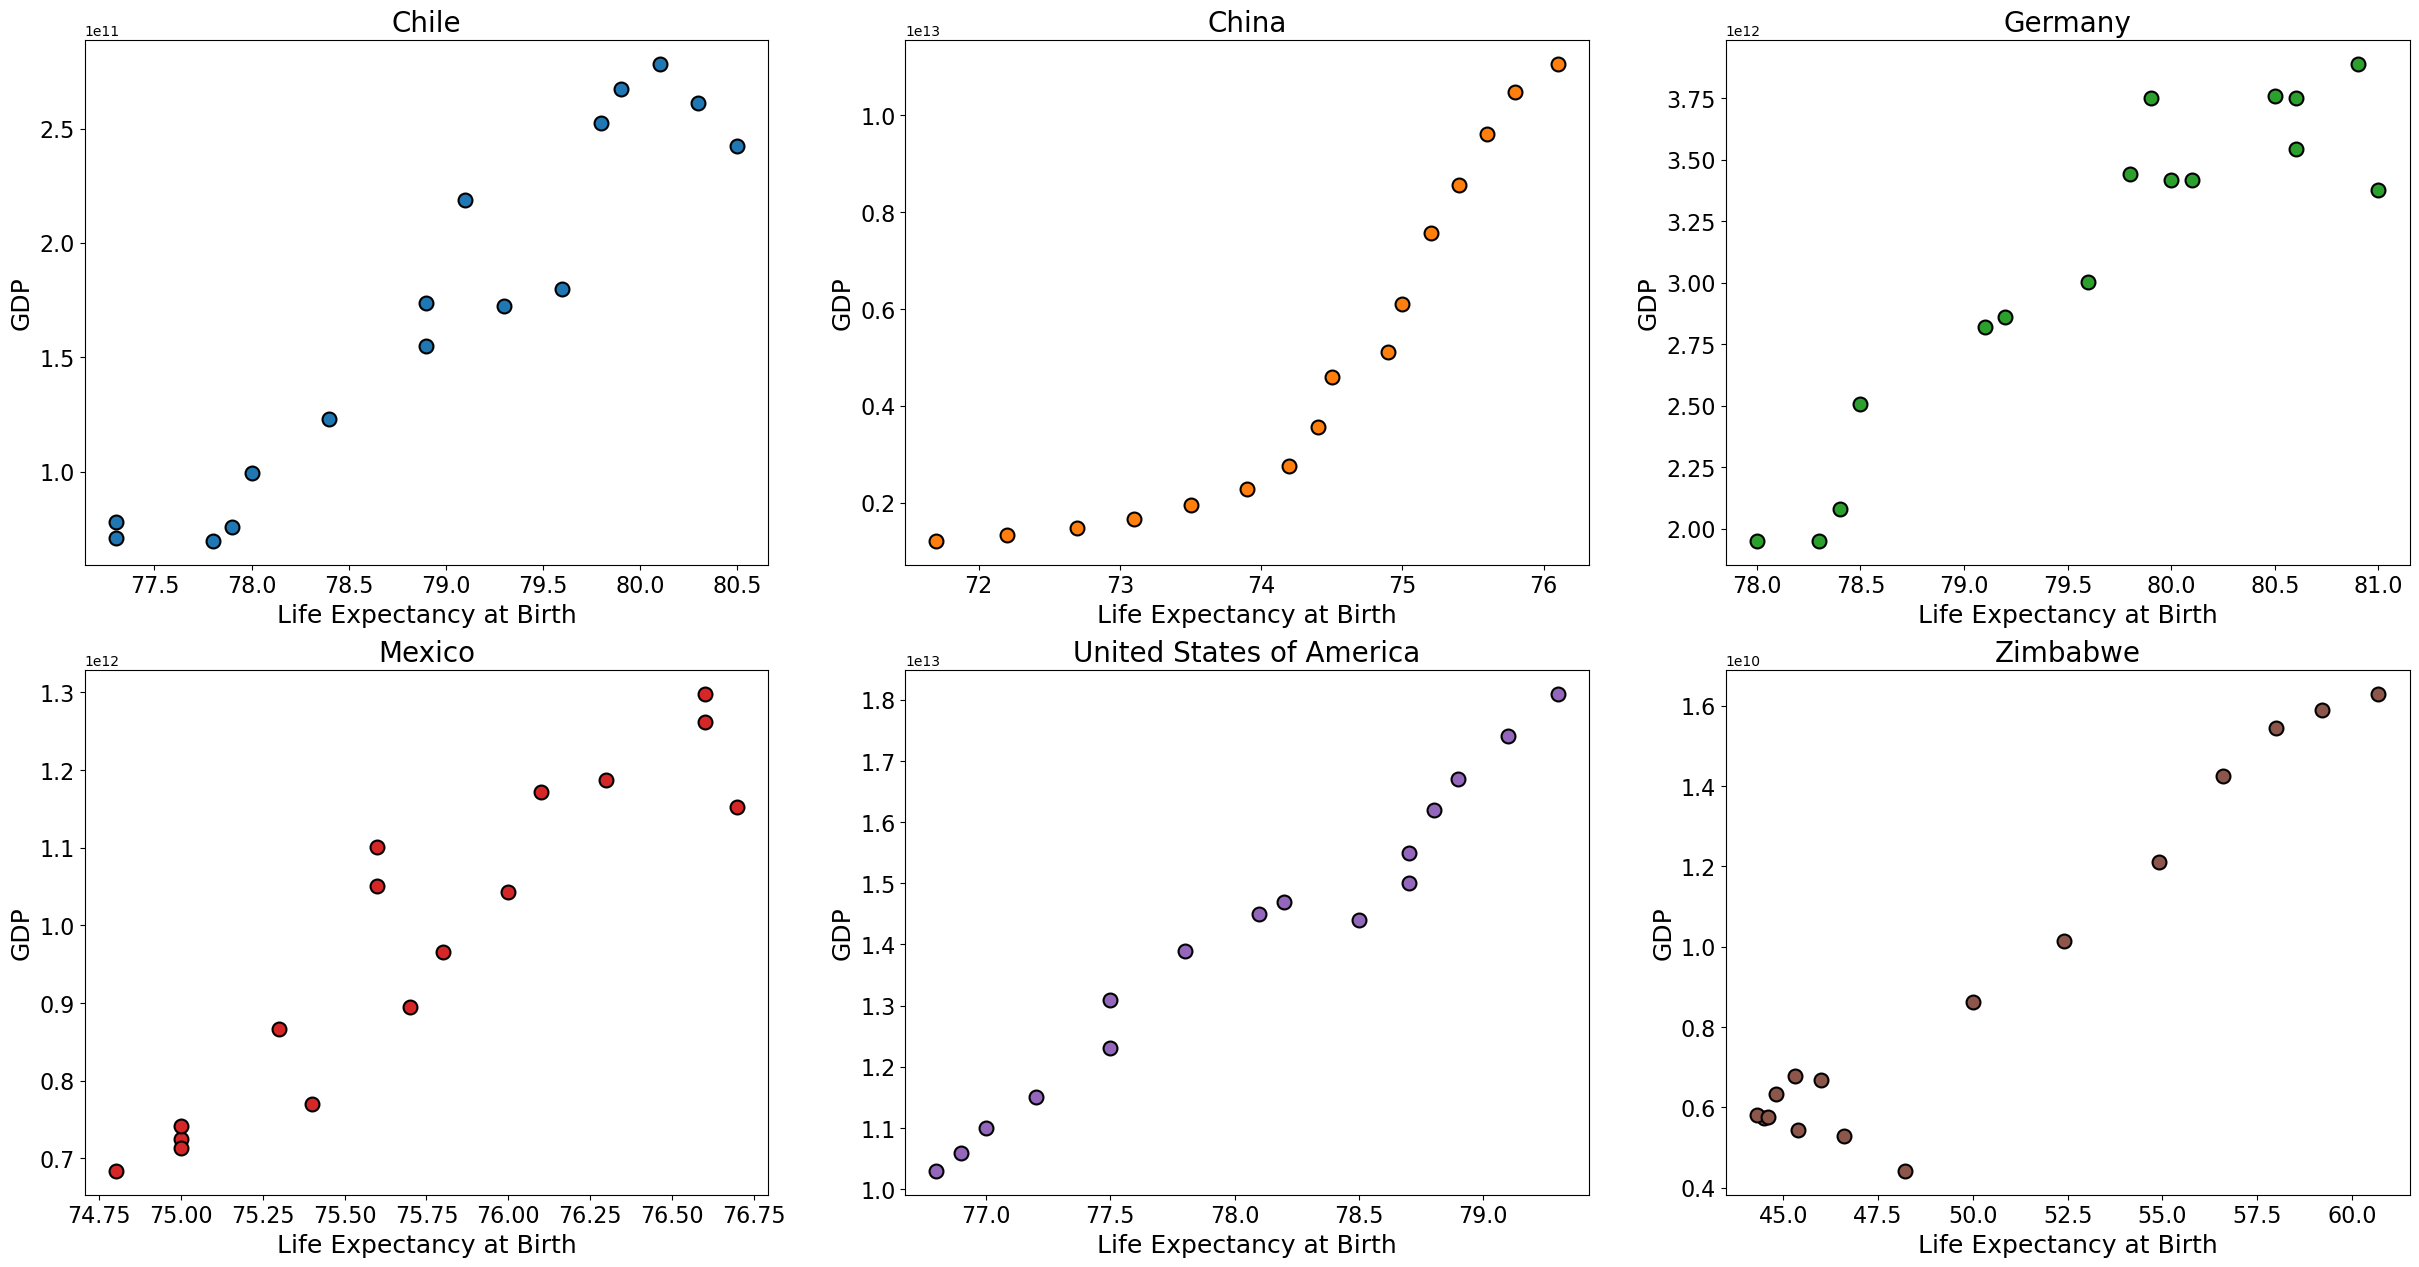

<Figure size 640x480 with 0 Axes>

In [20]:
countries = data['Country'].unique()

plt.figure(figsize=(30, 15))

palette = sns.color_palette("tab10", len(countries))

for i, country in enumerate(countries):
    plt.subplot(2, 3, i + 1)  
    country_data = data[data['Country'] == country] 
    scatter = sns.scatterplot(x='LEABY', y='GDP', data=country_data, color=palette[i], 
                              s=100, edgecolor='black', linewidth=1.5)  
    
    plt.title(country, fontsize=20)  
    plt.xlabel('Life Expectancy at Birth', fontsize=18) 
    plt.ylabel('GDP', fontsize=18)  
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

plt.show()
plt.clf()

7. Next, I wanted to look over the max, min, and mean of the life expectancy data, grouped by country.

In [22]:
max_life_expectancy = data.groupby('Country')['LEABY'].max()
print('The Maximum Life Expectancy by Country:')
print(max_life_expectancy)

The Maximum Life Expectancy by Country:
Country
Chile                       80.5
China                       76.1
Germany                     81.0
Mexico                      76.7
United States of America    79.3
Zimbabwe                    60.7
Name: LEABY, dtype: float64


In [23]:
min_life_expectancy = data.groupby('Country')['LEABY'].min()
print('The Minimum Life Expectancy by Country:')
print(min_life_expectancy)

The Minimum Life Expectancy by Country:
Country
Chile                       77.3
China                       71.7
Germany                     78.0
Mexico                      74.8
United States of America    76.8
Zimbabwe                    44.3
Name: LEABY, dtype: float64


In [24]:
average_life_expectancy = data.groupby('Country')['LEABY'].mean()
print('Average Life Expectancy by Country:')
print(average_life_expectancy)

Average Life Expectancy by Country:
Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: LEABY, dtype: float64


8. Lastly, I put together another figure that displays 6 histrograms that show the distribution of life expectancy for each country.

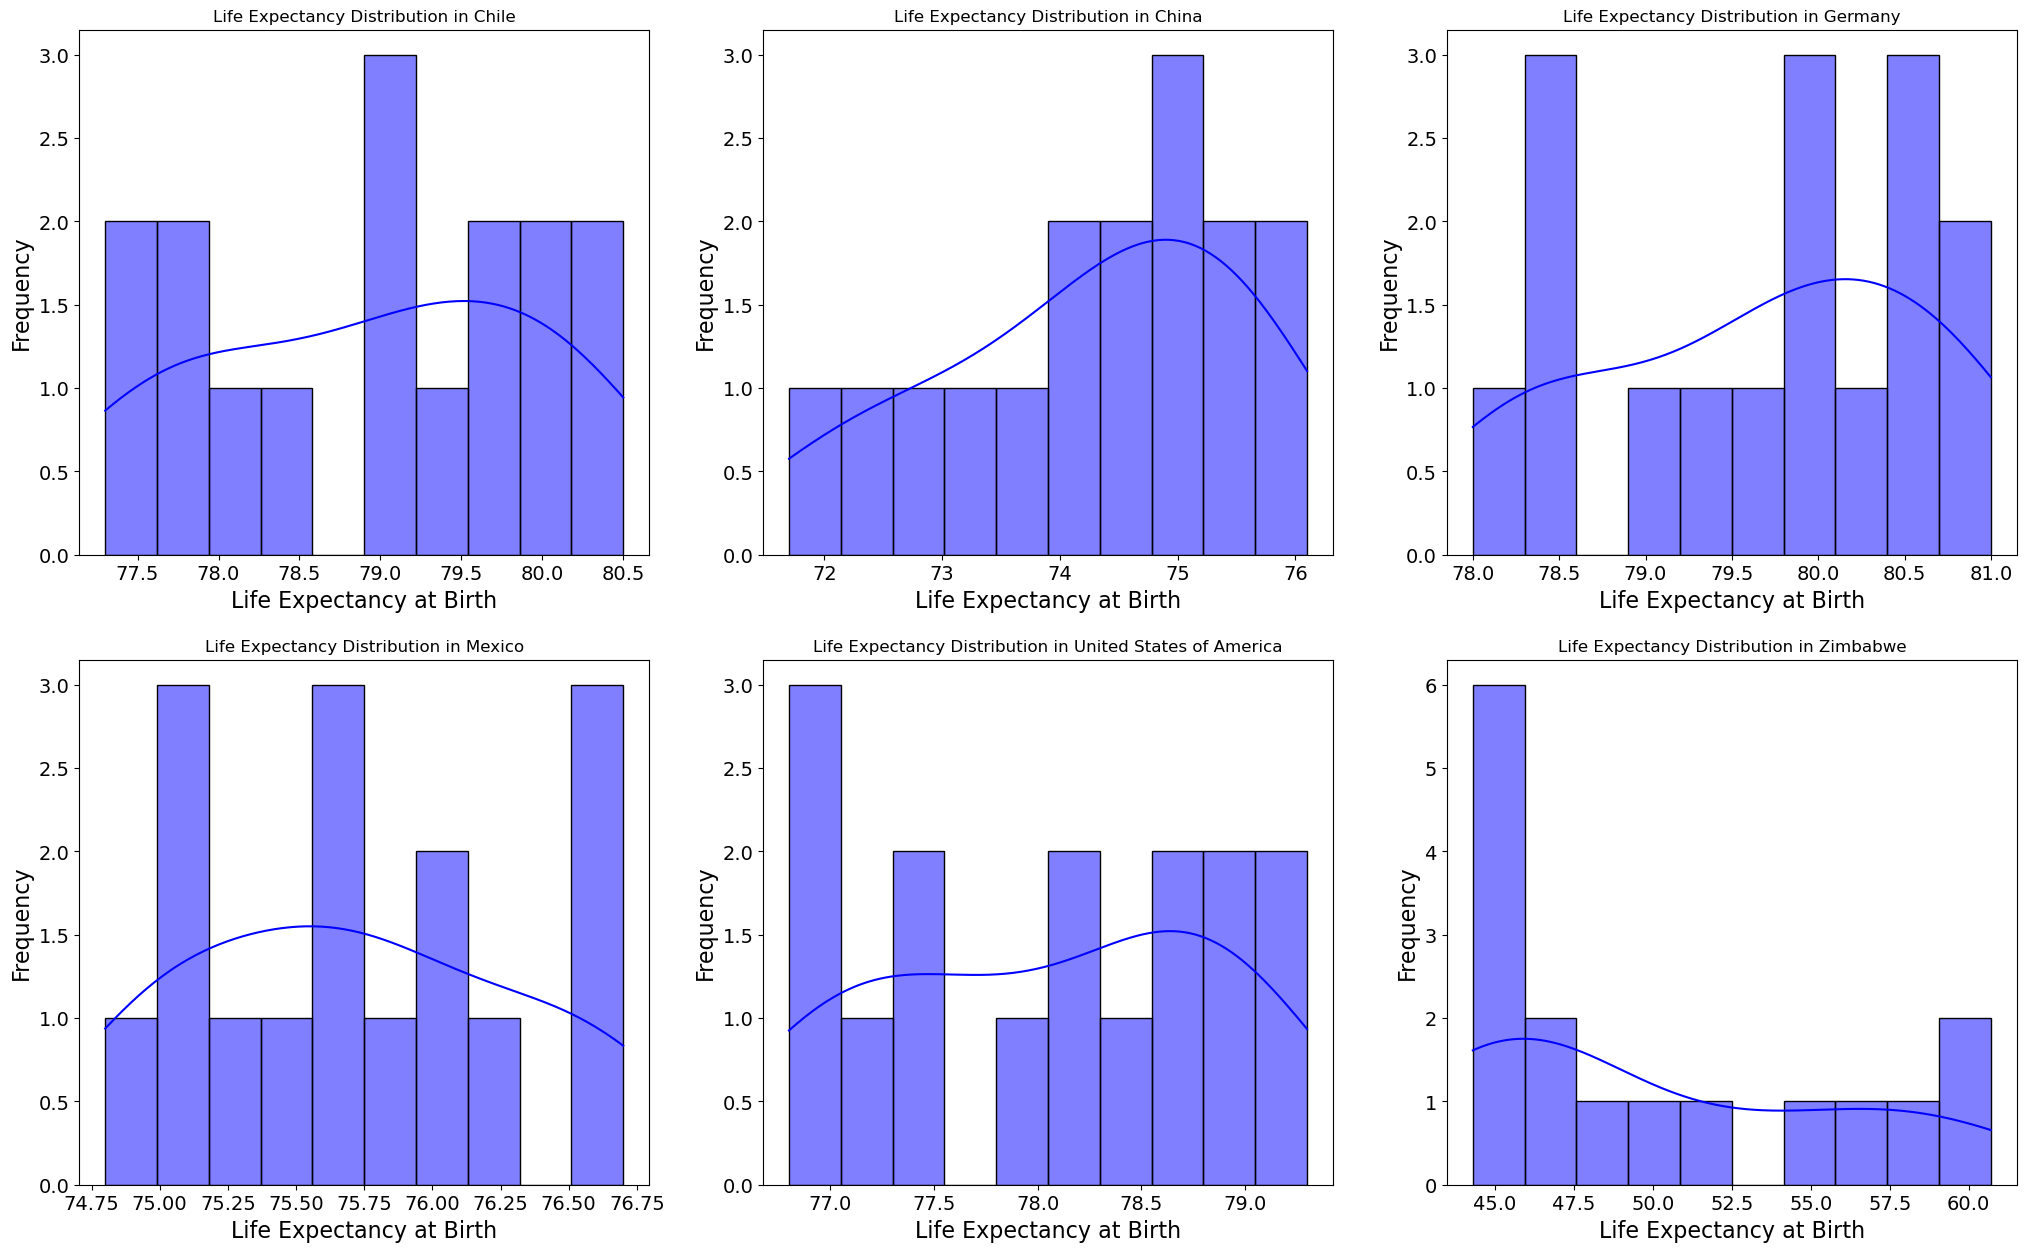

<Figure size 640x480 with 0 Axes>

In [26]:
countries = data['Country'].unique()

plt.figure(figsize=(25, 15))


for i, country in enumerate(countries):
    plt.subplot(2, 3, i + 1)  
    
    
    country_data = data[data['Country'] == country]
    
    
    sns.histplot(country_data['LEABY'], kde=True, bins=10, color='blue', edgecolor='black') 
    
    
    plt.title(f'Life Expectancy Distribution in {country}')
    plt.xlabel('Life Expectancy at Birth', fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)


plt.show()
plt.clf()